<!--NOTEBOOK_HEADER-->
*This notebook contains course material from [CBE 20255 Introduction to Chemical Engineering Analysis](http://jckantor.github.io/CBE20255/) 
by Jeffrey Kantor (jeff at nd.edu); the content is available [on GitHub](https://github.com/jckantor/CBE20255).
The text is released under the [CC-BY-NC-ND-4.0 license](https://creativecommons.org/licenses/by-nc-nd/4.0/legalcode),
and code is released under the [MIT license](https://opensource.org/licenses/MIT).*


<!--NAVIGATION-->
< [Adiabatic Flame Temperature](http://nbviewer.jupyter.org/github/jckantor/CBE20255/blob/master/notebooks/08.06-Adiabatic-Flame-Temperature.ipynb) | [Contents](toc.ipynb) | [Products: Product Design and Analysis](http://nbviewer.jupyter.org/github/jckantor/CBE20255/blob/master/notebooks/A.00-Projects-Product-Design-and-Analysis.ipynb) ><p><a href="https://colab.research.google.com/github/jckantor/CBE20255/blob/master/notebooks/08.07-Torpedo-Propulsion.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open in Google Colaboratory"></a>

# Torpedo Propulsion

## Summary

This notebook demonstrates a variety of energy calculations analyzing the design requirements for propulsion systems of naval torpedos.

## Background

[Torpedo technology](https://www.youtube.com/watch?v=RV8MF-440xg) contributes to the security and safety of naval forces. In this notebook we explore the extreme requirements and design alternatives for torpedo propulsion.

<p><a href="http://commons.wikimedia.org/wiki/File:MK46_torpedo_launch.jpg#/media/File:MK46_torpedo_launch.jpg"><img src="http://upload.wikimedia.org/wikipedia/commons/thumb/6/6f/MK46_torpedo_launch.jpg/1200px-MK46_torpedo_launch.jpg" alt="MK46 torpedo launch.jpg"></a><br>"<a href="http://commons.wikimedia.org/wiki/File:MK46_torpedo_launch.jpg#/media/File:MK46_torpedo_launch.jpg">MK46 torpedo launch</a>" by United States Navy, Mass Communication Specialist John L. Beeman - <a rel="nofollow" class="external text" href="http://www.news.navy.mil/view_single.asp?id=45069">Navy NewsStand Photo ID: 070412-N-9851B-007</a>
<a rel="nofollow" class="external text" href="http://www.news.navy.mil/">Navy NewsStand Home</a>. Licensed under Public Domain via <a href="//commons.wikimedia.org/wiki/">Wikimedia Commons</a>.</p>

Torpedo propulsion systems must operate in the absence of atmospheric oxygen for an oxidizer, provide the power necessary for fast and deep dives, be stable in storage and safe in marine and airborne environments. In this note we'll look at 

1. Calculating the energy and power required to for torpedo propulsion.
2. A monopropellant chemistry powering a hot-gas piston engine in the Mk 46 and Mk 48 torpedos.
3. A lithum/sulfur hexaflouride chemistry powering a self-contained Rankine cycle engine for the Mk 50 where the combustion products are more dense than the reactants.
4. An AgO/Al battery system powering an electrically driven torpedo.

## Power and Energy Requirements

The [drag force on a torpedo](http://tglang.com/uploads/Hydrodynamic_Drag_of_Torpedoes.pdf) is given by the formula

$$F_D = \frac{1}{2}\rho v^2 C_D A $$

where _C<sub>D</sub>_ is the drag coefficient, _&rho;_ is the density of the fluid, _v_ is velocity, and _A_ is the cross-sectional area. Assume _C<sub>D</sub>_ = 0.095 for a well-designed torpedo. 

The Mk-48 ADCAP, which is 21 inches in diameter and a mass of 1,663 kg, is claimed to have a range of 42,530 yards at 55 knots. 

* What is the power requirement in kw and horsepower at these speeds? 
* How much energy is required to accelerate the torpedo to its operating speed?  
* How much energy is required to cover the range of operation? 
* Assuming the propulsion system has an overall efficiency of 25%, how much fuel energy is required?

### Hydrodynamic Power Requirement

In [1]:
%matplotlib inline
import numpy as np

# One knot = 0.51444 meters per sec
v = 55*0.51444                # m/s

# One inch = 0.0254 meters
A = 0.25*np.pi*(21*0.0254)**2    # m**2

Cd = 0.095
rho = 1025.0                  # kg/m**3 (sea water)
Fd = 0.5*rho*v**2*Cd*A        # Newtons

print("Drag force at 55 knots = {:6.1f} Newtons".format(Fd))

W = v*Fd                      # Joules

print("Power requirement at 55 knots = {:6.1f} kW".format(W/1000.0))
print("Power requirement at 55 knots = {:6.1f} Hp".format(W/745.7))

Drag force at 55 knots = 8709.8 Newtons
Power requirement at 55 knots =  246.4 kW
Power requirement at 55 knots =  330.5 Hp


### Energy to Accelerate to Operating Speed

In [2]:
m = 1663.0        # kg
v = 55*0.51444    # m/s
Ea = 0.5*m*v**2   # Joules

print("Energy required to accelerate to 55 knots= {:6.1f} kJ".format(Ea/1000.0))

Energy required to accelerate to 55 knots=  665.7 kJ


### Energy to Reach Terminal Range

In [3]:
d = 42530*0.9144       # meters
v = 55*0.51444         # m/s
t = d/v                # seconds to range
Er = W*t               # energy required

print("Time required for range = {:6.1f} sec".format(t))
print("Energy required for range = {:7.1f} kJ".format(Er/1000))

Time required for range = 1374.5 sec
Energy required for range = 338719.2 kJ


### Fuel Energy Requirement

In [4]:
E_fuel = (Er + Ea)/0.25/1000.0      # kJ
print("Fuel Energy Requirment at 25% eff. = {:6.1f} kJ".format(E_fuel))

Fuel Energy Requirment at 25% eff. = 1357539.5 kJ


## Monopropellant Propulsion for the Mk 48 Torpedo

<p><a href="http://commons.wikimedia.org/wiki/File:Mk_48_torpedo_maintenance_1982.JPEG#/media/File:Mk_48_torpedo_maintenance_1982.JPEG"><img src="http://upload.wikimedia.org/wikipedia/commons/thumb/8/80/Mk_48_torpedo_maintenance_1982.JPEG/1200px-Mk_48_torpedo_maintenance_1982.JPEG" alt="Mk 48 torpedo maintenance 1982.JPEG"></a><br>"<a href="http://commons.wikimedia.org/wiki/File:Mk_48_torpedo_maintenance_1982.JPEG#/media/File:Mk_48_torpedo_maintenance_1982.JPEG">Mk 48 torpedo maintenance 1982</a>" by <a href="//en.wikipedia.org/wiki/United_States_Navy" class="extiw" title="en:United States Navy">United States Navy</a> - <a rel="nofollow" class="external text" href="http://www.defenseimagery.mil">U.S. DefenseImagery</a> photo VIRIN: <a rel="nofollow" class="external text" href="http://www.dodmedia.osd.mil/DVIC_View/Still_Details.cfm?SDAN=DNSC8600553&amp;JPGPath=/Assets/1986/Navy/DN-SC-86-00553.JPG">DN-SC-86-00553</a>. Licensed under Public Domain via <a href="//commons.wikimedia.org/wiki/">Wikimedia Commons</a>.</p>

The Mk 48 and torpedos use a monopropellant called Otto Fuel II to drive a hot-gas piston engine. The principle component of Otto fuel is propylene glycol dinitrate (PGDN, also called by its IUPAC name 1,2-propanediol dinitrate) that makes up 76% of the fuel by weight. Assuming the reaction proceeds as

C<sub>3</sub>H<sub>6</sub>N<sub>2</sub>O<sub>6</sub> &rarr; 3 CO<sub>2</sub> + 3 NH<sub>3</sub>

* What is the specific energy content measured as kJ/kg of fuel at standard conditions?

* The Mk 48 torpedo has an estimated maximum operating depth of 800m. What is specific energy content of the fuel at the pressure encountered at that depth?

* How much fuel will be required by the Mk 48 ADCAP?

### Specific Enthalpy of Reaction

The [density of Otto fuel](http://www.copperheadchemical.com/Defense/OTTOFuelII_0106.pdf) is 1.232 g/ml. The thermochemical data for [1,2-propanediol dinitrate](http://webbook.nist.gov/cgi/cbook.cgi?Name=1%2C2-propanediol+dinitrate&Units=SI) is available from the [NIST Webbook](http://webbook.nist.gov/chemistry/).

In [5]:
mw = dict()
mw['PGDN'] = 166.0895   # g/gmol

Hf = dict()
Hf['PGDN'] = -296.9     # kJ/gmol
Hf['CO2'] = -393.5      
Hf['NH3'] = -45.94  

dH = 3*Hf['CO2'] + 3*Hf['NH3'] - Hf['PGDN']
print("Molar Heat of Reaction = {:6.1f} kJ/gmol PGDN".format(dH))

dH_fuel = 0.76*1000*dH/mw['PGDN']
print("Heat of Reaction = {:6.1f} kJ/kg fuel".format(dH_fuel))

Molar Heat of Reaction = -1021.4 kJ/gmol PGDN
Heat of Reaction = -4673.9 kJ/kg fuel


### Specific Enthalpy of Reaction at 800m

In [6]:
# volume of fuel per kg-mol of PGDN
rho = 1232.0                       # kg/m**3
gmols = rho*0.76*1000.0/mw['PGDN'] # gmols/m**3
Vhat = 1.0/gmols                   # m**3/gmol

Patm = 101325.0                    # N/m**2
P800 = Patm + 800.0*1025.0*9.81    # N/m**2
R = 8.314                          # m**3Pa/K/gmol
T = 298.15                         # standard temperature

Hf['PGDN'] = -296.9 + Vhat*(P800-Patm)/1000
Hf['CO2'] = -393.5 + R*T*np.log(P800/Patm)/1000
Hf['NH3'] = -45.94 + R*T*np.log(P800/Patm)/1000

dH = 3*Hf['CO2'] + 3*Hf['NH3'] - Hf['PGDN']
print("Molar Heat of Reaction = {:6.1f} kJ/gmol PGDN".format(dH))

dH_fuel_800 = 0.76*1000*dH/mw['PGDN']
print("Heat of Reaction = {:6.1f} kJ/kg fuel".format(dH_fuel_800))

Molar Heat of Reaction = -957.6 kJ/gmol PGDN
Heat of Reaction = -4381.8 kJ/kg fuel


### Fuel Requirements

In [7]:
mass_fuel = E_fuel/(-dH_fuel)
print("Otto Fuel Required = {:6.1f} kg".format(mass_fuel))

Otto Fuel Required =  290.5 kg


We can also try and estimate the fuel capacity from [available diagrams of the Mk 48 torpedo](http://www.navsea.navy.mil/nuwc/newport/MAST/MK48.pdf). 

In [8]:
L = (400.0/1951.0)*5.86         # length of fuel tank in m
A = 0.25*np.pi*(0.50)**2           # cross-sectional area in m
V = A*L*1000.0                  # volume in liters
rho = 1.232                     # Otto fuel density in g/ml

print("Maximum fuel capacity = {:6.1f} liters".format(V))
print("Maximum fuel capacity = {:6.1f} kg".format(V*rho))

Maximum fuel capacity =  235.9 liters
Maximum fuel capacity =  290.6 kg


### Second Estimate of Fuel Requirements

Compute the engine work requirement assuming an 85% propulsion system efficiency, and a motor conversion efficiency of 88% (same as a Tesla roadster).

In [9]:
W_engine = (Ea+Er)/0.85/0.88

Estimate the adiabatic combustion temperature assuming that 76% of the fuel mass is available for a sensible temperature increase.

In [10]:
Cp = dict()
Cp['CO2'] = 35.6           # J/K/gmol
Cp['NH3'] = 37.0           # J/K/gmol

Tcomb = 298.15 - 0.76*dH*1000.0/(3*Cp['CO2'] + 3*Cp['NH3'])
print("Estimated Combustion Temperature = {:6.1f} K".format(Tcomb))

Estimated Combustion Temperature = 3639.6 K


Assume that work is extracted by a 12-to-1 [adiabatic expansion of the combustion gases](http://en.wikipedia.org/wiki/Adiabatic_process) in a hot-gas piston engine, compute the moles of hot gas required.

In [11]:
R = 8.314                  #  m**3 Pa/K/gmol
gamma = (0.52+0.21)/(0.4 + 0.16)
alpha = 1.0/(gamma-1)
Vr = 1.0 - 12.0**(1-gamma)
n_gas = W_engine/alpha/8.314/Tcomb/Vr
print("gram-moles of hot gas required = {:6.1f}".format(n_gas))

gram-moles of hot gas required = 8593.5


Assume the fuel additives have the same average molecular weight as the ammonia/carbon dioxide mixture.

In [12]:
n_pgdn = (0.76*n_gas)/6.0

mass_pgdn = mw['PGDN']*n_pgdn
mass_otto = mass_pgdn/0.76/1000.0

print("Otto fuel required = {:6.1f} kg".format(mass_otto))

Otto fuel required =  237.9 kg


## Mk 50 Torpedo

The [Mk 50 torpedo](http://en.wikipedia.org/wiki/Mark_50_torpedo) was designed a lightweight device that could be used against fast and deep-diving submarines. It is a much smaller device only 9.5 ft long, 12.75 inches in diameter, and 800 pounds. The small size allows it to launched from a variety of platforms, including ships, airplanes, and helicopters.

<p><a href="http://commons.wikimedia.org/wiki/File:US_Navy_040623-N-5319A-001_Sailors_assigned_to_the_weapons_department_aboard_the_guided_missile_destroyer_USS_Bulkeley_(DDG_84),_hoist_an_Anti-Submarine_Warfare_(ASW)_MK-50_Torpedo_off_of_the_flight_deck.jpg#/media/File:US_Navy_040623-N-5319A-001_Sailors_assigned_to_the_weapons_department_aboard_the_guided_missile_destroyer_USS_Bulkeley_(DDG_84),_hoist_an_Anti-Submarine_Warfare_(ASW)_MK-50_Torpedo_off_of_the_flight_deck.jpg"><img src="http://upload.wikimedia.org/wikipedia/commons/thumb/5/5a/US_Navy_040623-N-5319A-001_Sailors_assigned_to_the_weapons_department_aboard_the_guided_missile_destroyer_USS_Bulkeley_%28DDG_84%29%2C_hoist_an_Anti-Submarine_Warfare_%28ASW%29_MK-50_Torpedo_off_of_the_flight_deck.jpg/1200px-thumbnail.jpg" alt="US Navy 040623-N-5319A-001 Sailors assigned to the weapons department aboard the guided missile destroyer USS Bulkeley (DDG 84), hoist an Anti-Submarine Warfare (ASW) MK-50 Torpedo off of the flight deck.jpg"></a><br>"<a href="http://commons.wikimedia.org/wiki/File:US_Navy_040623-N-5319A-001_Sailors_assigned_to_the_weapons_department_aboard_the_guided_missile_destroyer_USS_Bulkeley_(DDG_84),_hoist_an_Anti-Submarine_Warfare_(ASW)_MK-50_Torpedo_off_of_the_flight_deck.jpg#/media/File:US_Navy_040623-N-5319A-001_Sailors_assigned_to_the_weapons_department_aboard_the_guided_missile_destroyer_USS_Bulkeley_(DDG_84),_hoist_an_Anti-Submarine_Warfare_(ASW)_MK-50_Torpedo_off_of_the_flight_deck.jpg">US Navy 040623-N-5319A-001 Sailors assigned to the weapons department aboard the guided missile destroyer USS Bulkeley (DDG 84), hoist an Anti-Submarine Warfare (ASW) MK-50 Torpedo off of the flight deck</a>" by U.S. Navy photo by Photographer's Mate 1st Class Brien Aho - This Image was released by the United States Navy with the ID <a rel="nofollow" class="external text" href="http://www.navy.mil/view_image.asp?id=15405">040623-N-5319A-001</a>. Licensed under Public Domain via <a href="//commons.wikimedia.org/wiki/">Wikimedia Commons</a>.</p>

A critical part of its design is the Stored Chemical Energy Propulsion System (SCEPS) in which sulfur hexaflouride gas is sprayed onto a solid block of lithium to produce the heat necessary to run a steam-powered, closed-cycle rankine engine. Sulfer hexaflouride has a number of interesting properties which are demonstrated in these videos.

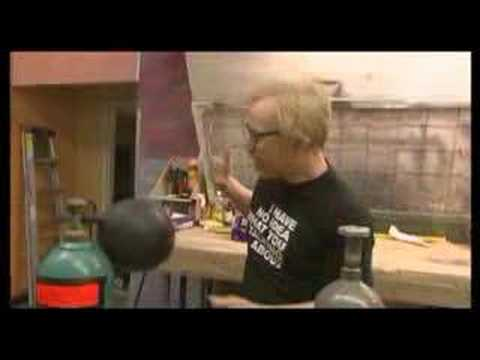

In [13]:
from IPython.display import YouTubeVideo
YouTubeVideo("d-XbjFn3aqE",420,315,rel=0)

Sulfur hexaflouride is relatively inert but reacts with lithium at an operating temperature of about 790 &deg;C via the [stoichiometric reaction](http://www.dtic.mil/dtic/tr/fulltext/u2/a224846.pdf)

8 Li + SF<sub>6</sub> &rarr; Li<sub>2</sub>S + 6 LiF

This reaction produces no gaseous products which allows the propulsion system to be completely self-contained - an enormous design advantage for a torpedo that must operate under high pressure conditions in deep ocean waters.

* Estimate the heat of reaction at the normal operating conditions. 
* What is the heat of reaction per unit mass of reactants?  Per unit volume? Compare to the lower heating values of some common fuels.
* The heat is used to generate steam for a closed cycle Rankine engine employing a steam turbine. The creep limit of stainless steel limits the inlet temperature of the steam turbine to 565 &deg;C. If the condenser temperature is 30 &deg;C, what is the maximum acheivable Carnot efficiency of the steam engine?  
* An alternative formula for estimating the heat engine efficiency under maximum power conditions is the Curzon-Ahlborn efficiency given by $\eta = 1-\sqrt{\frac{T_{cold}}{T_{hot}}}$. Estimate the Curzon-Ahlborn efficiency of this steam engine. 
* The Mk 50 torpedo has a diameter of 12.75 inches, an estimated speed of 50 knots, and an estimated range of 15 km. Assuming a drag coefficient 0.10, an engine efficiency equal to the Curzon-Ahlborn efficiency, and an overall propulsion system efficiency of 85%, how much fuel is required?

The core issue for this problem is finding reliable thermodynamic information.  Here's one source ( [http://www.update.uu.se/~jolkkonen/pdf/CRC_TD.pdf](http://www.update.uu.se/~jolkkonen/pdf/CRC_TD.pdf)) that you may find useful in addition to the [NIST Webbook](http://webbook.nist.gov/chemistry/).

### Heat of Reaction

In [14]:
Hf = dict()    # kJ/gmol
Cp = dict()    # J/K/gmol

Hf['Li'] = 0.0
Cp['Li'] = 24.8

Hf['SF6'] = -1220.5
Cp['SF6'] = 97.0

Hf['Li2S'] = -441.4
Cp['Li2S'] = 54.1           # Missing Data, use Li2O

Hf['LiF'] = -616.0
Cp['LiF'] = 41.6

Hr = Hf['Li2S'] + Cp['Li2S']*(25-790)/1000.0 \
     + 6*(Hf['LiF'] + Cp['LiF']*(25-790)/1000.0) \
     - 8*Hf['Li'] - Hf['SF6']

print("Heat of Reaction at 790 deg C = {:6.1f} kJ/gmol".format(Hr))

Heat of Reaction at 790 deg C = -3149.2 kJ/gmol


### Specific Heat of Reaction

In [15]:
mw = dict()
mw['Li'] = 6.941
mw['SF6'] = 146.06

dH = Hr*1000.0/(8*mw['Li'] + mw['SF6'])
print("Heat of Reaction at 790 deg C = {:6.1f} kJ/kg".format(dH))

Heat of Reaction at 790 deg C = -15622.1 kJ/kg


### Carnot Efficiency

In [16]:
eta_carnot = 1 - (30+273.15)/(565+273.15)
print("Carnot efficiency = {:6.3f}".format(eta_carnot))

Carnot efficiency =  0.638


### Curzon-Ahlborn Efficiency

In [17]:
eta_ca = 1 - np.sqrt((30+273.15)/(565+273.15))
print("Curzon-Ahlborn efficiency = {:6.3f}".format(eta_ca))

Curzon-Ahlborn efficiency =  0.399


### Fuel Requirement

In [18]:
A = 0.25*np.pi*(12.75*0.0254)**2     # area in m**2
rho = 1025.0                      # kg/m**3
v = 50*0.5144                     # m/s
Cd = 0.10
Fd = 0.5*rho*Cd*A*v**2            # drag force in Newtons

print("Drag force at 50 knots = {:6.1f} Newtons".format(Fd))

W = v*Fd

print("Power requirement at 50 knots = {:6.1f} Watts".format(W))
print("Power requirement at 50 knots = {:6.1f} Hp".format(W/745.7))

t = 15000.0/v                     # time in sec
E = W*t/1000.0                    # energy required in kJ

print("Hydrodynamic Energy requirement at 50 knots = {:6.1f} kJ".format(E))

E_fuel = E/0.85/eta_ca

print("Fuel Energy requirement at 50 knots = {:6.1f} kJ".format(E_fuel))

print("Fuel Requirement at 50 knots = {:6.1f} kg".format(E_fuel/(-dH)))
w_Li = 8*mw['Li']/(8*mw['Li'] + mw['SF6'])
print("Li Requirement = {:6.2f} kg".format(w_Li*E_fuel/(-dH)))
print("SF6 Requirement = {:6.2f} kg".format((1-w_Li)*E_fuel/(-dH)))

Drag force at 50 knots = 2792.6 Newtons
Power requirement at 50 knots = 71826.5 Watts
Power requirement at 50 knots =   96.3 Hp
Hydrodynamic Energy requirement at 50 knots = 41889.5 kJ
Fuel Energy requirement at 50 knots = 123638.9 kJ
Fuel Requirement at 50 knots =    7.9 kg
Li Requirement =   2.18 kg
SF6 Requirement =   5.73 kg


## The Black Shark Electric Torpedo

The [Black Shark torpedo](http://en.wikipedia.org/wiki/Black_Shark_torpedo) is an electrically powered, 21 inch diameter torpedo produced by Whitehead Sistemi Subacquei (WASS) group of Italy. It has an estimated range of 22 km at a speed of 52 knots.  

<img src = "http://www.naval.com.br/blog/wp-content/uploads/2009/02/al-torpedos.jpg"/ style = "height:600px">

The Black Shark torpedo employs a salt water activated [AgO-Al battery[(http://www.saftbatteries.com/force_download/Torpedo_brochure09_13.pdf) The anode half-reaction is

2 Al + 8 OH<sup>-</sup> &rarr; 2 Al0<sub>2</sub><sup>-</sup> + 4 H<sub>2</sub>O + 6 electrons

The OH<sup>-</sup> is produced by the dissolution of NaOH when then the torpedo enters the water. The cathode half-reaction is

3 AgO + 3 H<sub>2</sub>O + 6 electrons &rarr; 3 Ag + 6 OH<sup>-</sup>

for an overall electrochemical reaction

2 Al + 3 AgO + 2 OH<sup>-</sup> &rarr; 2 AlO<sub>2</sub><sup>-</sup> + 3 AgO + H<sub>2</sub>O

An individual battery cell has a measured potential of E<sub>cell</sub> = 1.33 volts under operating conditions.  The Gibb's free energy $\Delta G$, is related to the number of electrons transferred in the reaction, $n$, and the cell potential by

$$\Delta G = -n F E_{cell} $$

where $F = 96,485$ Columbs/gmol is the charge on one gram-mole of electrons.

Assuming the battery/motor system has an overall efficiency of a Tesla roadster (88% efficient), and the propulsion system is 85% efficient, estimate the chemical reactants necessary to power the Black Shark torpedo.

### Gibb's Free Energy

In [19]:
dG = -6.0*96485.0*1.33/1000.0
print("Gibb's Free Energy = {:6.1f} kJ".format(dG))

mw['Al'] = 26.98
mw['AgO'] = 231.735
mw['NaOH'] = 39.997

dG = 1000.0*dG/(2*mw['Al'] + 3*mw['AgO'] + 2*mw['NaOH'])
print("Gibb's Free Energy = {:6.1f} kJ/kg".format(dG))

Gibb's Free Energy = -770.0 kJ
Gibb's Free Energy = -928.6 kJ/kg


### Energy Requirement

In [20]:
A = 0.25*np.pi*(21.0*0.0254)**2      # area in m**2
rho = 1025.0                      # kg/m**3
v = 52*0.5144                     # m/s
Cd = 0.095
Fd = 0.5*rho*Cd*A*v**2            # drag force in Newtons

print("Drag force at 52 knots = {:6.1f} Newtons".format(Fd))

W = v*Fd

print("Power requirement at 52 knots = {:6.1f} Watts".format(W))
print("Power requirement at 52 knots = {:6.1f} Hp".format(W/745.7))

t = 22000.0/v                     # time in sec
E = W*t/1000.0                    # energy required in kJ

print("Hydrodynamic Energy requirement at 52 knots = {:6.1f} kJ".format(E))

Drag force at 52 knots = 7784.3 Newtons
Power requirement at 52 knots = 208221.8 Watts
Power requirement at 52 knots =  279.2 Hp
Hydrodynamic Energy requirement at 52 knots = 171255.6 kJ


### Battery Requirement

In [21]:
E_battery = E/0.85/0.88

print("Battery Energy requirement at 52 knots = {:6.1f} kJ".format(E_battery))

print("Battery Reactant Requirements at 52 knots = {:6.1f} kg".format(E_battery/(-dG)))

Battery Energy requirement at 52 knots = 228951.3 kJ
Battery Reactant Requirements at 52 knots =  246.6 kg


<!--NAVIGATION-->
< [Adiabatic Flame Temperature](http://nbviewer.jupyter.org/github/jckantor/CBE20255/blob/master/notebooks/08.06-Adiabatic-Flame-Temperature.ipynb) | [Contents](toc.ipynb) | [Products: Product Design and Analysis](http://nbviewer.jupyter.org/github/jckantor/CBE20255/blob/master/notebooks/A.00-Projects-Product-Design-and-Analysis.ipynb) ><p><a href="https://colab.research.google.com/github/jckantor/CBE20255/blob/master/notebooks/08.07-Torpedo-Propulsion.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open in Google Colaboratory"></a>